In [2]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

In [5]:
# Generate n iid ~ N(0,1)
def generate(n):
    return sp.stats.norm.rvs(size=n)

## 1.a
> Невідомі ні $a$, ні $\sigma^2$

Використаємо
$\hat a_n \sim \mathcal N(a, \sigma^2/n)$

Але замість теор дисперсії візьмемо вибіркову

In [268]:
# a) For UNknown variance and unknown mean
def task_1A(X, axes):
    print(f"task_1A (N= {X.shape[0]})")

    mean = X.mean()        # вибіркове середнє
    s2 = X.var(ddof=0)  # вибіркова дисперсія (1/n)
    sigma = np.sqrt(s2)
    n_sqrt = np.sqrt(X.shape[0])
    gamma = 0.01

    # ppf(x) = F^{-1}(x)
    # sp.stats.norm.ppf(0.5) = 0
    z = sp.stats.norm.ppf(1 -(gamma/2))
    
    a = mean - sigma * z / n_sqrt
    b = mean + sigma * z / n_sqrt
    print(f"> Mean= {mean:.5f}; D= {s2}")
    print(f"> z = {z}; 1-(gamma/2)= {1 -(gamma/2)}")
    print(f"> Interval: ({a:.5f} ; {b:.5f}); Size= {b-a:.5f}")

    if a < 0 < b:
        print(f"> 0 is in the interval - OK")
    else:
        print(f"> 0 is outside the interval - NOT OK")

    axes.hist(X, density=True, bins=(min(int(X.shape[0] / 5), 25)), histtype='stepfilled', alpha=0.5)
    axes.set_xlim([-4, 4])

    pdfx = np.linspace(-4,4,200)
    pdfy = sp.stats.norm.pdf(pdfx, mean, sigma)
    axes.plot(pdfx, pdfy, alpha=0.2)

    axes.fill_between(pdfx, pdfy, where=((pdfx >= a) & (pdfx <= b)), alpha=0.5, label='confidence interval')

    axes.axvline(mean)
    axes.text(mean, 0.1, 'mean', rotation=90)
    # axes.axvline(a)
    # axes.text(a, 0.1, 'z1', rotation=90)
    # axes.axvline(b)
    # axes.text(b, 0.1, 'z2', rotation=90)

    axes.set_title(f"task_1A. N= {X.shape[0]}, (b-a)= {b-a:.5f}")
    axes.legend(frameon=False)

    print()


task_1A (N= 100)
> Mean= -0.03084; D= 0.8258105839626857
> z = 2.5758293035489004; 1-(gamma/2)= 0.995
> Interval: (-0.26492 ; 0.20324); Size= 0.46815
> 0 is in the interval - OK

task_1A (N= 10000)
> Mean= 0.01357; D= 0.974876550459121
> z = 2.5758293035489004; 1-(gamma/2)= 0.995
> Interval: (-0.01187 ; 0.03900); Size= 0.05087
> 0 is in the interval - OK

task_1A (N= 1000000)
> Mean= -0.00025; D= 0.9987278765412982
> z = 2.5758293035489004; 1-(gamma/2)= 0.995
> Interval: (-0.00282 ; 0.00233); Size= 0.00515
> 0 is in the interval - OK



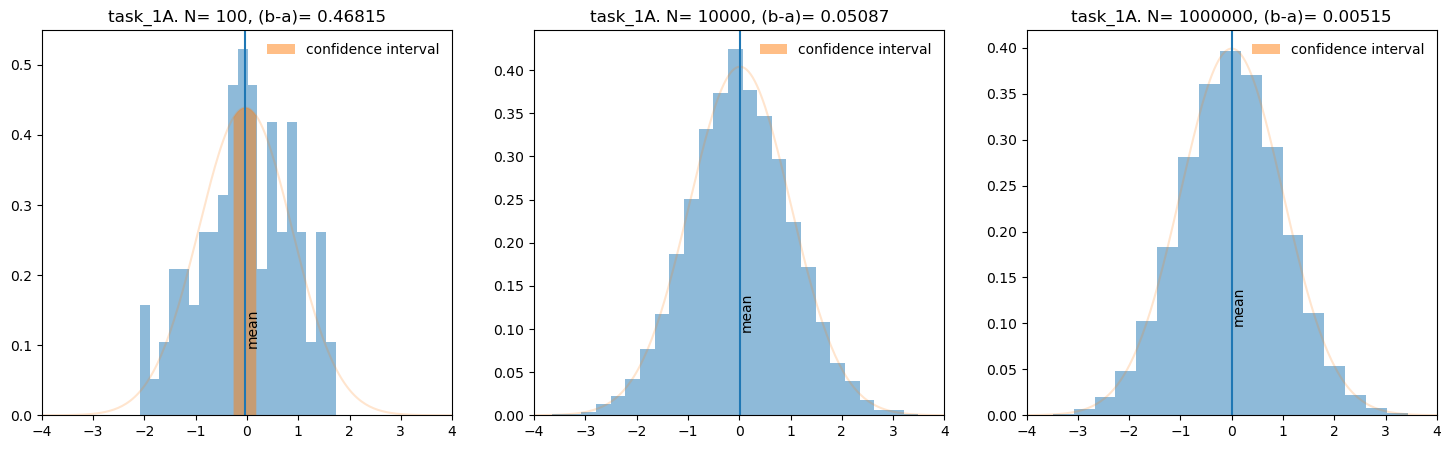

In [269]:
Xs = [generate(100), generate(10_000), generate(1_000_000)]
fig, axs = plt.subplots(1,3)
for X,ax in zip(Xs, axs):
    task_1A(X, ax)
fig.set_size_inches((18,5))

## 1.b
> Невідомі ні $a$, ні $\sigma^2$, ні сам **розподіл**

Використаємо
$\displaystyle \frac{\sum_i x_i - na}{\sqrt{n} \sigma} \longrightarrow \mathcal N(0, 1)$

$\displaystyle \sqrt{n} \frac{\overline x - a}{\sigma} \longrightarrow \mathcal N(0, 1)$

Але замість теор статистик візьмемо вибіркові
$a \to \hat a_n; \quad \sigma \to \hat \sigma_n$

Інтервал буде $\displaystyle \left(\hat a - \frac{z \hat \sigma}{\sqrt{n}}; \hat a + \frac{z \hat \sigma}{\sqrt n}\right)$
де $z = \Phi(1-\gamma/2)$

In [272]:
# b) unknown everything including distribution
def task_1B(X, axes):
    print(f"task_1B (N= {X.shape[0]})")

    mean = X.mean()        # вибіркове середнє
    s2 = X.var(ddof=1)  # вибіркова дисперсія (1/n-1)
    sigma = np.sqrt(s2)
    n_sqrt = np.sqrt(X.shape[0])
    gamma = 0.01

    # ppf(x) = F^{-1}(x)
    # sp.stats.norm.ppf(0.5) = 0
    z = sp.stats.norm.ppf(1 -(gamma/2))
    
    a = mean - sigma * z / n_sqrt
    b = mean + sigma * z / n_sqrt
    print(f"> Mean= {mean:.5f}; D= {s2}")
    print(f"> z = {z}; 1-(gamma/2)= {1 -(gamma/2)}")
    print(f"> Interval: ({a:.5f} ; {b:.5f}); Size= {b-a:.5f}")

    if a < 0 < b:
        print(f"> 0 is in the interval - OK")
    else:
        print(f"> 0 is outside the interval - NOT OK")

    axes.hist(X, density=True, bins=(min(int(X.shape[0] / 5), 25)), histtype='stepfilled', alpha=0.5)
    axes.set_xlim([-4, 4])

    axes.axvline(mean)
    axes.text(mean, 0.1, 'mean', rotation=90)
    axes.axvline(a, lw=0.5)
    axes.text(a, 0.2, 'z1', rotation=90)
    axes.axvline(b, lw=0.5)
    axes.text(b, 0.3, 'z2', rotation=90)

    axes.set_title(f"task_1B. N= {X.shape[0]}, (b-a)= {b-a:.5f}")
    axes.legend(frameon=False)

    print()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


task_1B (N= 100)
> Mean= -0.02009; D= 0.8786797121470423
> z = 2.5758293035489004; 1-(gamma/2)= 0.995
> Interval: (-0.26154 ; 0.22136); Size= 0.48291
> 0 is in the interval - OK

task_1B (N= 10000)
> Mean= 0.00580; D= 1.006791267864809
> z = 2.5758293035489004; 1-(gamma/2)= 0.995
> Interval: (-0.02005 ; 0.03165); Size= 0.05169
> 0 is in the interval - OK

task_1B (N= 1000000)
> Mean= -0.00110; D= 0.999439706293706
> z = 2.5758293035489004; 1-(gamma/2)= 0.995
> Interval: (-0.00367 ; 0.00148); Size= 0.00515
> 0 is in the interval - OK



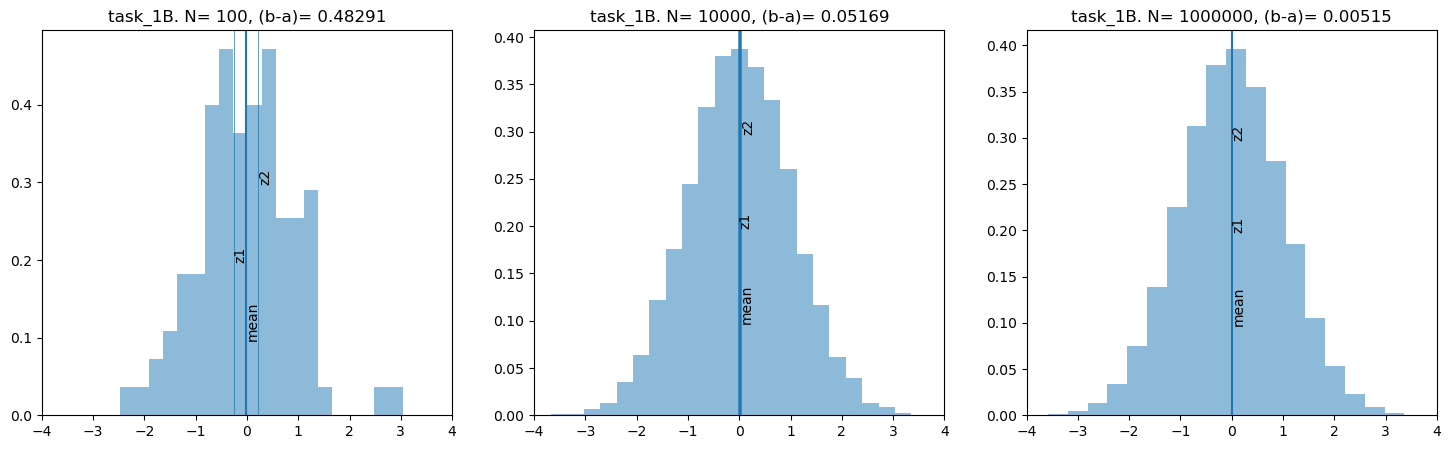

In [273]:
Xs = [generate(100), generate(10_000), generate(1_000_000)]
fig, axs = plt.subplots(1,3)
for X,ax in zip(Xs, axs):
    task_1B(X, ax)
fig.set_size_inches((18,5))

## 1.c
> Невідомі $a$ та $\sigma^2$. Будуємо інтервал для $\sigma^2$$

Використаємо
$\displaystyle \frac{n\hat\sigma^2}{\sigma^2} \sim \chi^2(n-1)$

Інтервал буде $\displaystyle \left(\frac{n \hat \sigma^2}{\beta}; \frac{n \hat \sigma^2}{\alpha}\right)$  
де $\alpha = F^{-1}_{\chi^2(n-1)}(\gamma/2)$, $\beta = F^{-1}_{\chi^2(n-1)}(1-\gamma/2)$

In [300]:
# c)
def task_1C(X, axes):
    print(f"task_1C (N= {X.shape[0]})")

    mean = X.mean()        # вибіркове середнє
    s2 = X.var(ddof=1)  # вибіркова дисперсія (1/n-1)
    sigma = np.sqrt(s2)
    n = X.shape[0]
    n_sqrt = np.sqrt(X.shape[0])
    gamma = 0.01

    # ppf(x) = F^{-1}(x)
    z1 = sp.stats.chi2.ppf(gamma/2, n-1)
    z2 = sp.stats.chi2.ppf(1 - gamma/2, n-1)
    
    a = n * s2 / z2
    b = n * s2 / z1

    print(f"> Mean= {mean:.5f}; D= {s2}")
    print(f"> z1= {z1}; z2= {z2};")
    print(f"> Interval: ({a:.5f} ; {b:.5f}); Size= {b-a:.5f}")

    if a < 1 < b:
        print(f"> 1 is in the interval - OK")
    else:
        print(f"> 1 is outside the interval - NOT OK")

    axes.hist(X, density=True, bins=(min(int(X.shape[0] / 5), 25)), histtype='stepfilled', alpha=0.5)
    axes.set_xlim([-4, 4])


    pdfx = np.linspace(-4,4,200)
    pdfy_a = sp.stats.norm.pdf(pdfx, mean, a)
    pdfy_b = sp.stats.norm.pdf(pdfx, mean, b)
    axes.plot(pdfx, pdfy_a, alpha=1, label='$\sigma^2 = a$')
    axes.plot(pdfx, pdfy_b, alpha=1, label='$\sigma^2 = b$')

    # axes.axvline(mean)
    # axes.text(mean, 0.1, 'mean', rotation=90)
    # axes.axvline(a, lw=0.5)
    # axes.text(a, 0.2, 'z1', rotation=90)
    # axes.axvline(b, lw=0.5)
    # axes.text(b, 0.3, 'z2', rotation=90)

    axes.set_title(f"task_1C. N= {X.shape[0]}, (b-a)= {b-a:.5f}")
    axes.legend(frameon=False)

    print()


task_1C (N= 30)
> Mean= 0.42768; D= 0.5818072933741945
> z1= 13.12114888796041; z2= 52.335617785933614;
> Interval: (0.33351 ; 1.33024); Size= 0.99673
> 1 is in the interval - OK

task_1C (N= 100)
> Mean= -0.00676; D= 0.8102605575921032
> z1= 66.51010530173737; z2= 138.98678345093953;
> Interval: (0.58298 ; 1.21825); Size= 0.63528
> 1 is in the interval - OK

task_1C (N= 10000)
> Mean= -0.00499; D= 1.008849800992204
> z1= 9638.498196541614; z2= 10367.014838397536;
> Interval: (0.97313 ; 1.04669); Size= 0.07355
> 1 is in the interval - OK

task_1C (N= 1000000)
> Mean= -0.00045; D= 1.0020883669088438
> z1= 996359.9857567691; z2= 1003645.5274370939;
> Interval: (0.99845 ; 1.00575); Size= 0.00730
> 1 is in the interval - OK



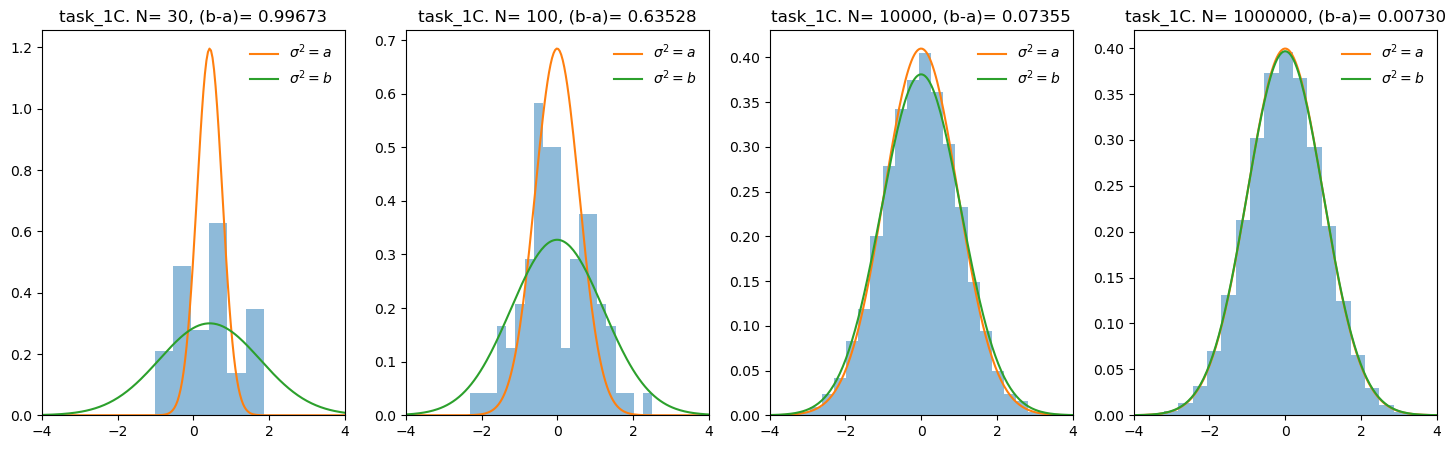

In [301]:
Xs = [generate(30), generate(100), generate(10_000), generate(1_000_000)]
fig, axs = plt.subplots(1,4)
for X,ax in zip(Xs, axs):
    task_1C(X, ax)
fig.set_size_inches((18,5))